<a href="https://colab.research.google.com/github/sumitsingh976/sunday1/blob/master/3SepLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://colab.research.google.com/drive/1j4i6PelkE7HwkbIRydUdldGQQhzCgV4I?usp=sharing

In [ ]:
#Agenda
  #Implementation of Logistic Regression
    # 2 Days Implementation session

  #Import the Data / Read Data
  #EDA

  #Feature selection 
  #Model Building
  #Accuracy 

In [ ]:
#Import / Read Data
  #Overview of Problem Statement
  #Overview of Data
  #Importing Data 

In [ ]:
#Overview of Problem Statement
  #Bank marketing leads will subscribe to a scheme, Term Deposit(variable y)

In [ ]:
#Overview of Data
  #Categorical data regarding Bank Marketing Leads


In [ ]:
#Importing Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import Data
data = pd.read_csv('/content/bank-additional-full.csv',sep = ';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.marital.value_counts()

married     24934
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
#Function to check the number of rows and columns
data.shape 

(41199, 21)

In [ ]:
#Function to check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
#Function to check statistical overview of data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#5 Value summary of Data
  #Min , Q1(25%), Median/Q2(50%), Q3(75%), Max

In [ ]:
#function to check the datatype of features

In [ ]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
#function to check different values of a column
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4109
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
#Changing the value of y
data['y'] =  np.where(data['y'] == 'yes' , 1,0)
data['y'] = data['y'].astype(str)

In [ ]:
data.y.value_counts()

0    36559
1     4640
Name: y, dtype: int64

In [ ]:
#EDA(Exploratory Data Analysis)
  #Missing value Analysis
  #Outlier Analysis

In [ ]:
#Missing value analysis
  #checking null values
  #Handling null values

In [ ]:
#Checking Null values
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [ ]:
#Handle Null values
  #if data is large
    #Drop Null Values
      #data.dropna()
  #if data is small
    #if dtype = object
      #replace = Mode
    #else
      #replace = mean

In [ ]:
#Handling Null Values
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
#data.job.mode()[0]
data.job.mode()[0]

'admin.'

In [ ]:
data.age.mean()

40.03031921349678

In [ ]:
data.age.median()

38.0

In [ ]:
#Handle Null values
col_list = list(data.columns)

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
col_list.remove('y')

In [ ]:
for col_name in col_list:
  if(data[col_name].dtypes == 'object'):
    data[col_name] = data[col_name].fillna(data[col_name].mode()[0])
  else:
    data[col_name] = data[col_name].fillna(data[col_name].mean())

In [ ]:
data.y.value_counts()

0    36559
1     4640
Name: y, dtype: int64

In [ ]:
#Recheck Null Values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
#Outlier Analysis
  #Outlier Detection
  #Outlier removal

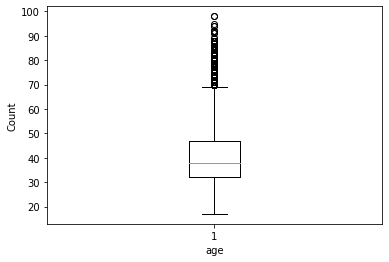

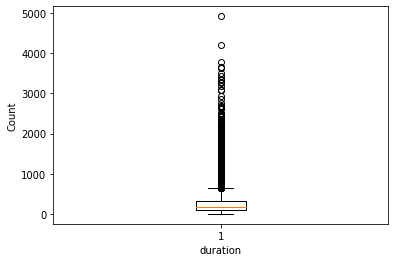

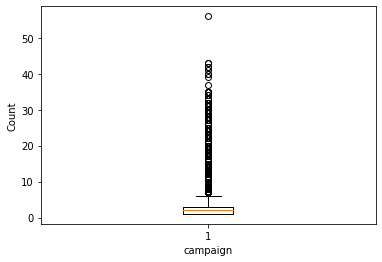

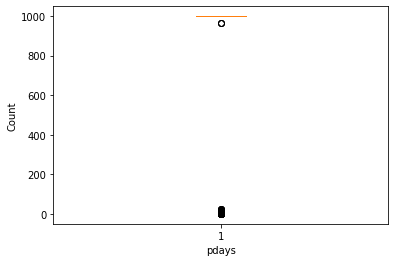

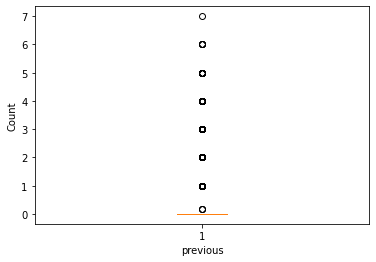

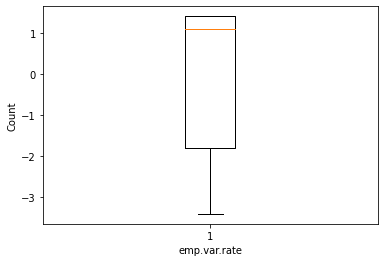

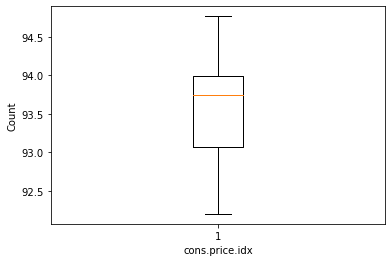

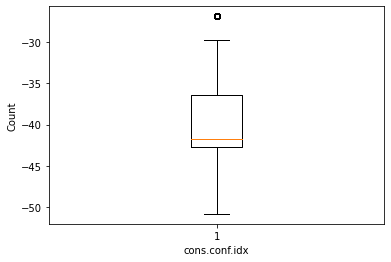

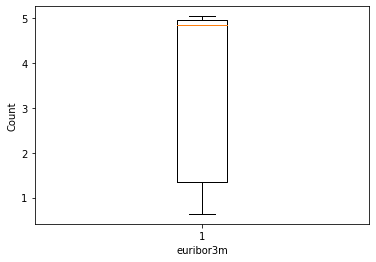

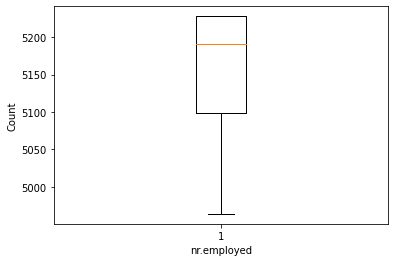

In [ ]:
#Outlier Detection
  #boxplot
for i in col_list:
  if(data[i].dtype == 'int64' or data[i].dtype == 'float64'):
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

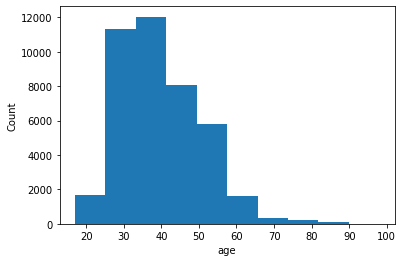

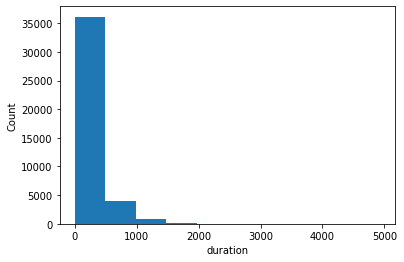

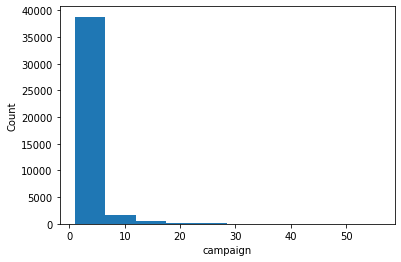

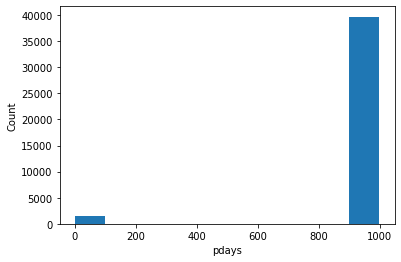

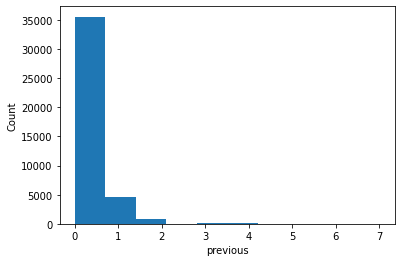

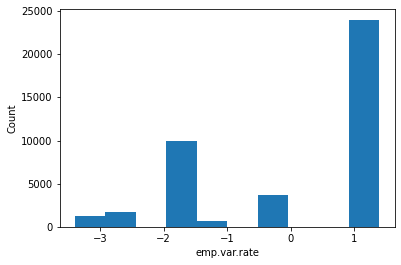

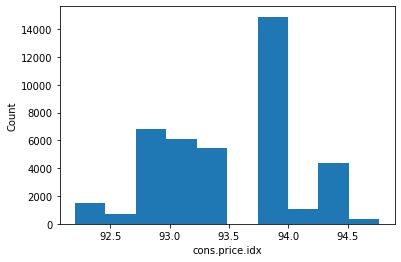

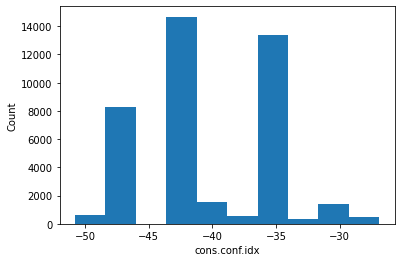

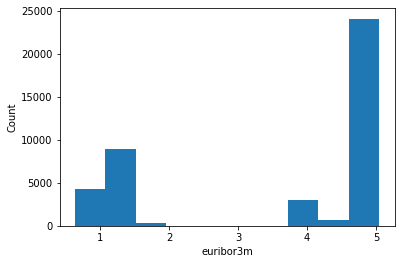

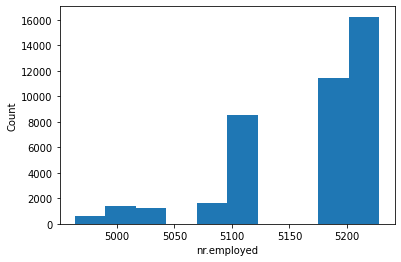

In [ ]:
#Distribution
for i in col_list:
  if(data[i].dtypes == 'int64' or data[i].dtypes == 'float64'):
    plt.hist(data[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#Handling Outliers
  #IQR
  #Mean

In [ ]:
#Mean 
print('Highest value Allowed :',data['age'].mean() + 3*data['age'].std())
print('Lowest value Allowed :',data['age'].mean() - 3*data['age'].std())

Highest value Allowed : 71.3242525263679
Lowest value Allowed : 8.736385900625685


In [ ]:
#IQR 
  # lowest : Q1 - 1.5*IQR
  # highest: Q3 + 1.5*IQR 

q1 = data.duration.quantile(0.25)
q3 = data.duration.quantile(0.75)
iqr = q3 - q1
print('Highest value Allowed :',(data.duration.quantile(0.75) + (1.5*iqr)))
print('Lowest value Allowed :',(data.duration.quantile(0.25) - (1.5*iqr)))


Highest value Allowed : 644.5
Lowest value Allowed : -223.5


In [ ]:
#Outlier Removal 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64

In [ ]:
#Inter Quartile Range
  # range which provides range between Quartiles

In [ ]:
#Outlier removal
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]
#data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR)))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [ ]:
data.shape

(30360, 21)

In [ ]:
data.y.value_counts()

0    28705
1     1655
Name: y, dtype: int64

In [ ]:
query = data.age > 20
data[query]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
#Binning
  #convert continuous variable to categorical 
bins = [0,1,5,10,25,50,100]
data.age = pd.cut(data.age,bins) 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
data.age.value_counts()

(25, 50]     24302
(50, 100]     4949
(10, 25]      1109
(0, 1]           0
(1, 5]           0
(5, 10]          0
Name: age, dtype: int64

In [ ]:
data.y.value_counts()
# Logistic regression -> categorical data 

0    28705
1     1655
Name: y, dtype: int64

# Day 2

In [ ]:
#Agenda
  #Recap
  #Feature selection
  #Model Building 
  #Accuracy

In [ ]:
#Recap

In [ ]:
#Feature Selection
  #selecting the required/ important features / properties / columns for model

  #Encoding
    #changing object type to numerical
  #VIF
    #process of selecting features on the basis of multicoleaniarity
  

In [ ]:
#Encoding 
  #LabelEncoding

In [ ]:
# gender | gender
# Male   | 0
# Female | 1
# Other  | 2

In [ ]:
#Encoding requires independent object format data
col_list = []
for i in data.columns:
  if((data[i].dtype == 'object')& (i != 'y')):
    col_list.append(i)
col_list.append('age')
col_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'age']

In [ ]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in col_list:
  data[i] = label.fit_transform(data[i])

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
data.marital.value_counts()

1    18647
2     8305
0     3362
3       46
Name: marital, dtype: int64

In [ ]:
# OneHot - > creates extra columns
#gender
#m / f 
#gender m f
# m     1 0   

In [ ]:
#VIF
  #variance inflation factor
  #extract important features on the basis of concept named multicollenearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
#Multicollnearity
  #relation between one or more than one column is very high

  #VIF
    #check multicollenearity between data and provides a VIF value 
    #0 - 4 < very less multicollenarity : very important features
    #4 - 5 < less multicollenearity : important features 
    #5 - <6< fair multicollenearity : normal features
    # >6   < High multicollenearity : not needed features

In [ ]:
#VIF reuires numerical independent columns
col_list = []
for i in data.columns:
  if((data[i].dtype != 'object')& (i != 'y')):
    col_list.append(i)

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
vif_data

,feature,VIF
0,age,1.099807
1,job,1.025365
2,marital,1.095777
3,education,1.099320
4,default,1.091979
5,housing,1.013153
6,loan,1.003026
7,contact,2.719023
8,month,2.059462
9,day_of_week,1.010873


In [ ]:
data = data.drop(['pdays'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
  if((data[i].dtype != 'object')& (i != 'y')):
    col_list.append(i)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
vif_data

,feature,VIF
0,age,8.703249
1,job,2.095210
2,marital,5.200432
3,education,4.460453
4,default,1.410682
5,housing,2.192741
6,loan,1.208273
7,contact,3.589441
8,month,7.816661
9,day_of_week,3.106289


In [ ]:
data = data.drop(['nr.employed'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
  if((data[i].dtype != 'object')& (i != 'y')):
    col_list.append(i)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
vif_data

,feature,VIF
0,age,8.703184
1,job,2.095170
2,marital,5.199740
3,education,4.460449
4,default,1.409515
5,housing,2.192125
6,loan,1.208172
7,contact,2.749890
8,month,6.752041
9,day_of_week,3.105672


In [ ]:
data = data.drop(['cons.price.idx'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
  if((data[i].dtype != 'object')& (i != 'y')):
    col_list.append(i)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,8.404554
1,job,2.086249
2,marital,5.077423
3,education,4.387891
4,default,1.406885
5,housing,2.187296
6,loan,1.207540
7,contact,2.505175
8,month,6.414972
9,day_of_week,3.082770


In [ ]:
data = data.drop(['euribor3m'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
  if((data[i].dtype != 'object')& (i != 'y')):
    col_list.append(i)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,7.809775
1,job,2.075524
2,marital,4.973142
3,education,4.199148
4,default,1.406715
5,housing,2.176803
6,loan,1.207275
7,contact,2.495454
8,month,5.782796
9,day_of_week,3.034532


In [ ]:
data = data.drop(['cons.conf.idx'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
  if((data[i].dtype != 'object')& (i != 'y')):
    col_list.append(i)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,5.885356
1,job,2.048867
2,marital,4.109692
3,education,3.947833
4,default,1.396176
5,housing,2.109109
6,loan,1.202249
7,contact,2.482859
8,month,5.136100
9,day_of_week,2.893672


In [ ]:
data = data.drop(['age'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
  if((data[i].dtype != 'object')& (i != 'y')):
    col_list.append(i)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,job,2.027048
1,marital,4.109666
2,education,3.727354
3,default,1.337452
4,housing,2.066146
5,loan,1.199312
6,contact,2.482828
7,month,4.858438
8,day_of_week,2.818011
9,duration,2.809123


In [ ]:
data = data.drop(['previous','poutcome'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
  if((data[i].dtype != 'object')& (i != 'y')):
    col_list.append(i)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,job,2.027048
1,marital,4.109666
2,education,3.727354
3,default,1.337452
4,housing,2.066146
5,loan,1.199312
6,contact,2.482828
7,month,4.858438
8,day_of_week,2.818011
9,duration,2.809123


In [ ]:
#Model Building
x = data[vif_data.feature]
y = data.y

In [ ]:
#train,test,split
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2,random_state = 0)

In [ ]:
x_train.shape

(24288, 12)

In [ ]:
x_test.shape

(6072, 12)

In [ ]:
#Model Fitting
from sklearn.linear_model import LogisticRegression as lr

In [ ]:
logmodel = lr()

In [ ]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred = logmodel